In [3]:
import pymc
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style('grade3', fscale=1.3)
jtplot.figsize(x=18, y=10)

Load Traces

In [2]:
s1 = pymc.database.pickle.load('30000Samples_10059.pickle')
s2 = pymc.database.pickle.load('30000Samples_10060.pickle')
s3 = pymc.database.pickle.load('30000Samples_10075.pickle')
s4 = pymc.database.pickle.load('30000Samples_10079.pickle')
sample_dict = {'10059':s1, '10060':s2, '10075':s3, '10079':s4}
param_dict = {'ddfsnow': 'Degree Day Factor Snow',
              'tempchange': 'Temperature Change', 'precfactor': 'Precipitation Factor', 'massbal': 'Mass Balance'}

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
plots/10059_ddfsnow_30000steps.png
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
plots/10060_ddfsnow_30000steps.png
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
plots/10075_ddfsnow_30000steps.png
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
plots/10079_ddfsnow_30000steps.png
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
plots/10059_tempchange_30000steps.png
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
plots/10060_tempchange_30000steps.png
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
plots/10075_tempchange_30000steps.png
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
plots/10079_tempchange_30000steps.png
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
plots/10059_precfactor_30000steps.png
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
plots/10060_precfactor_30000steps.png
<class 'numpy.ndarray'>
<class '

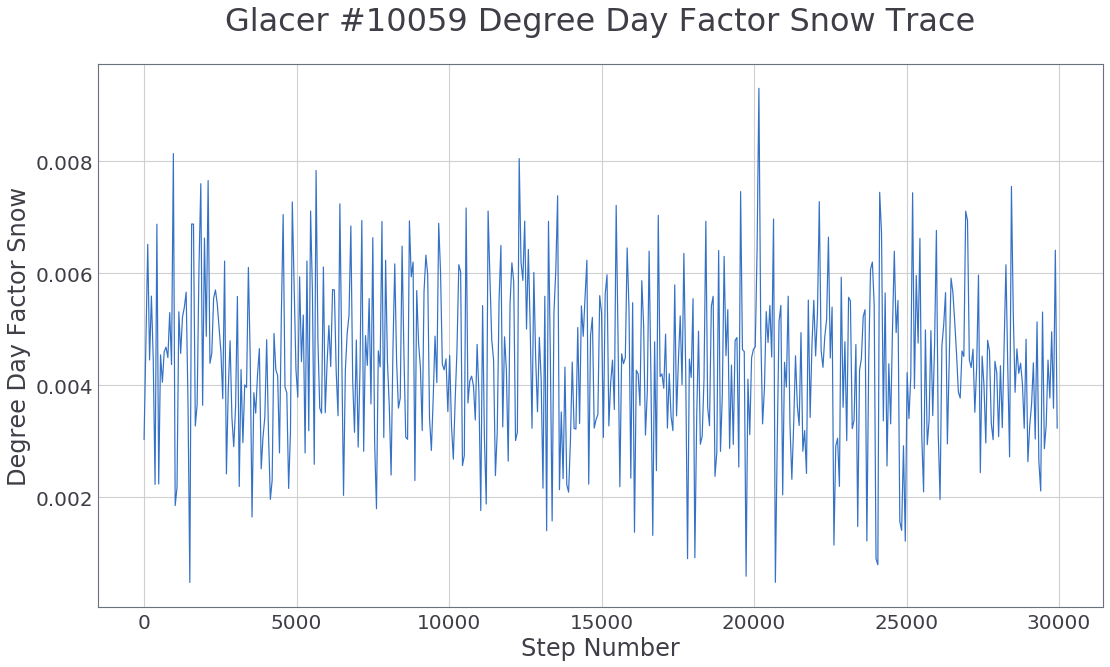

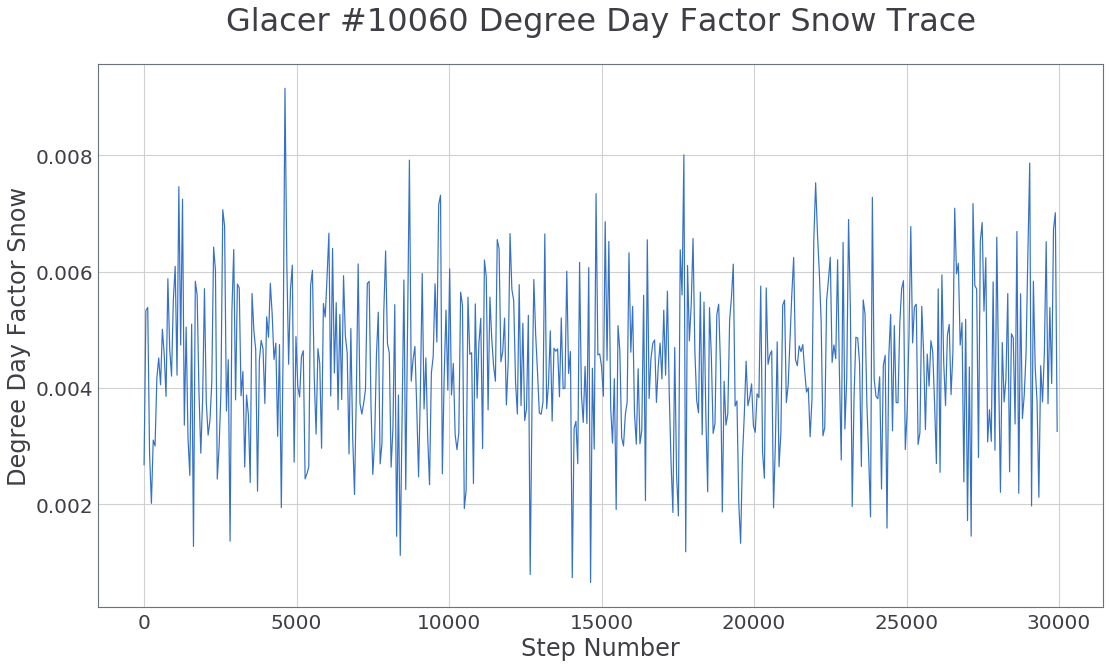

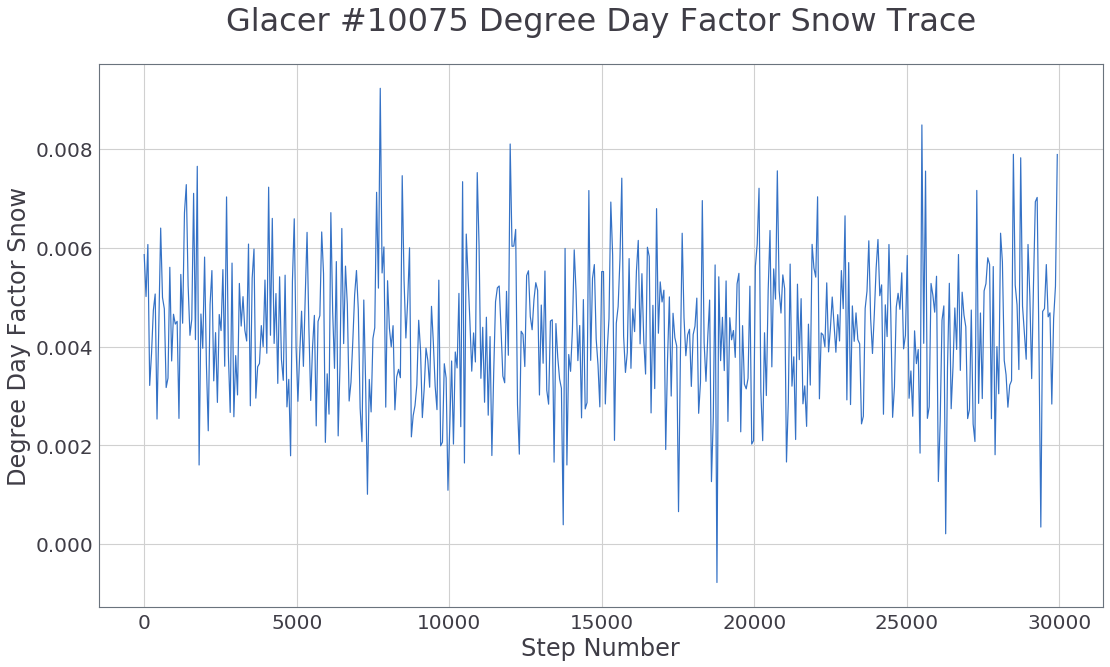

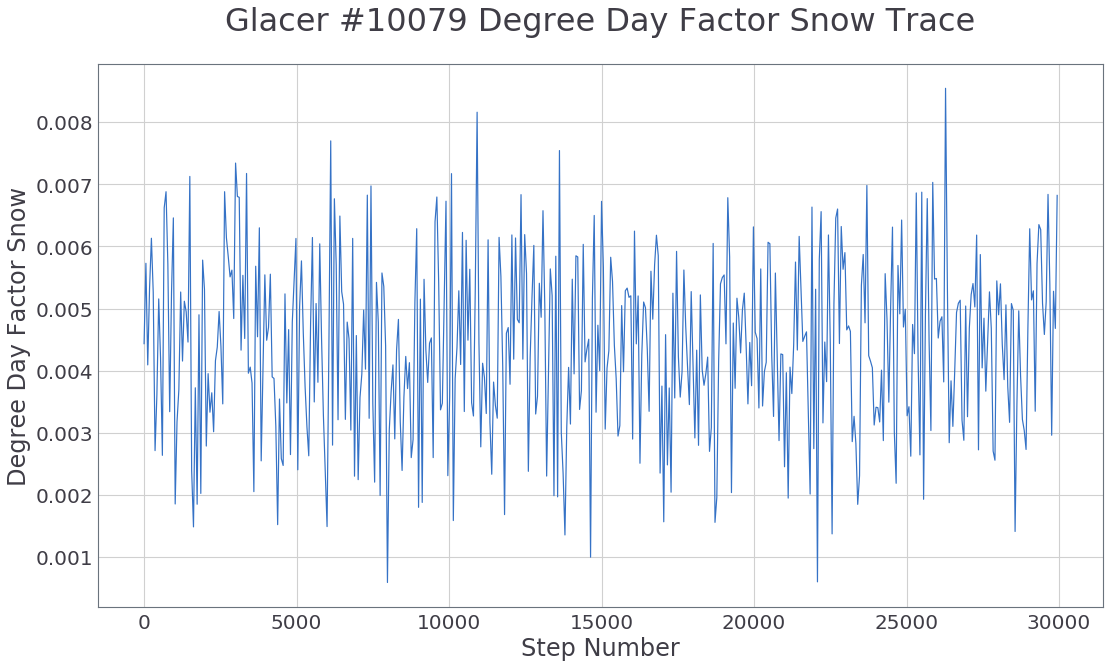

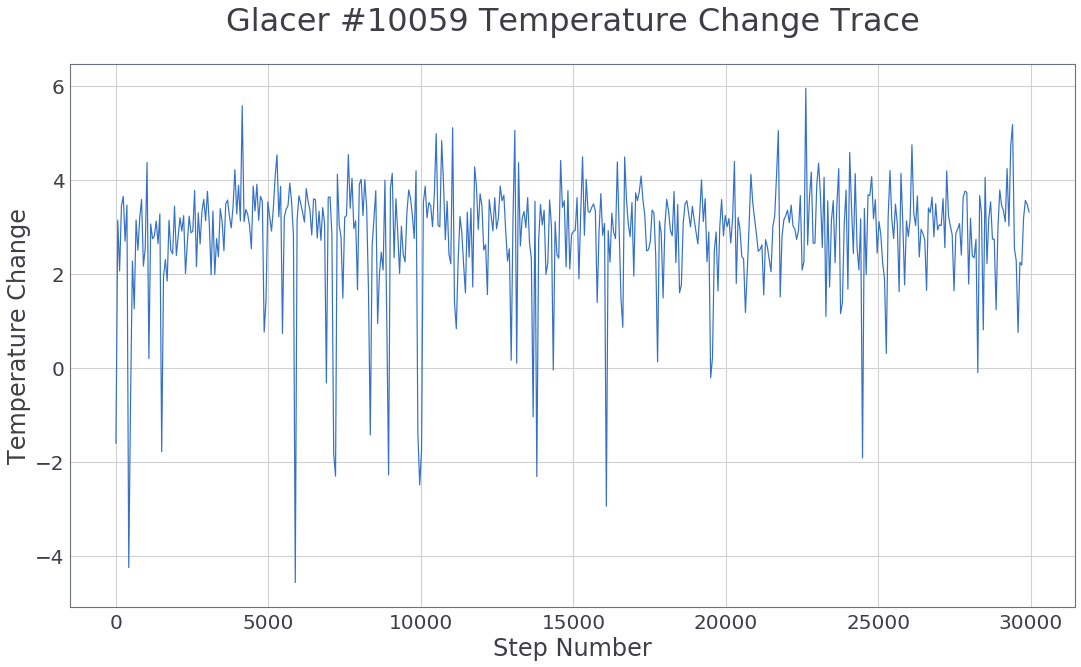

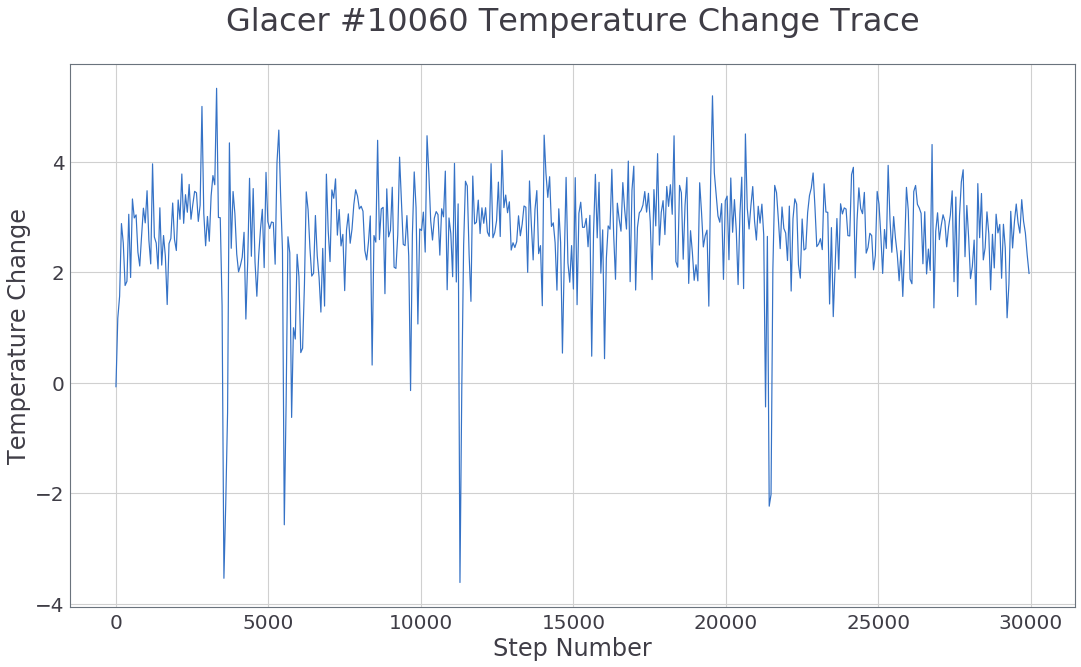

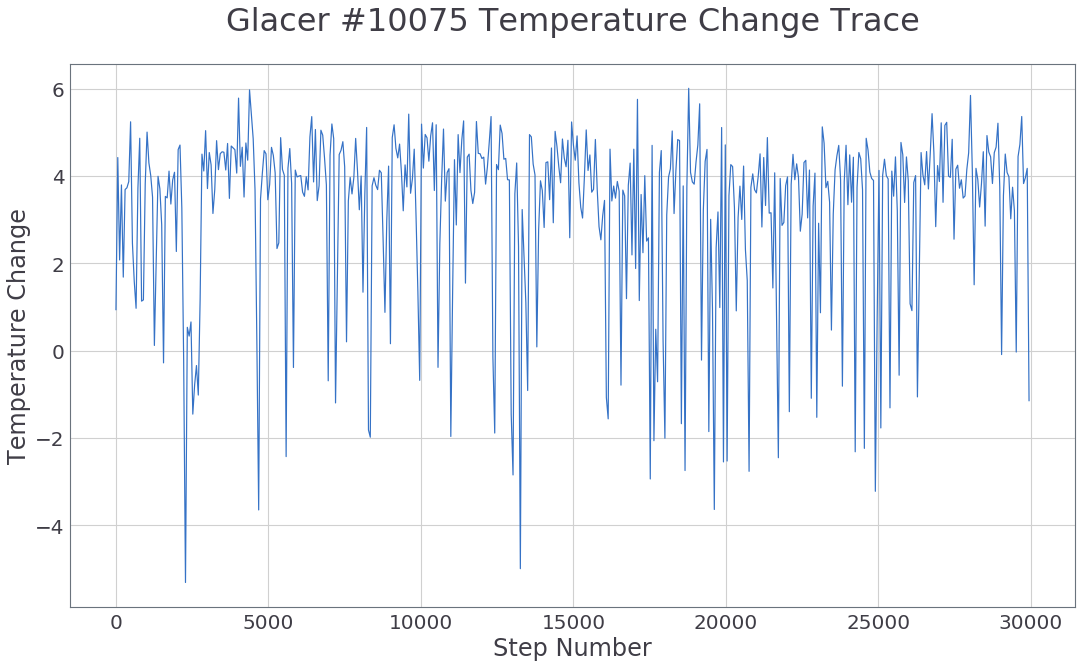

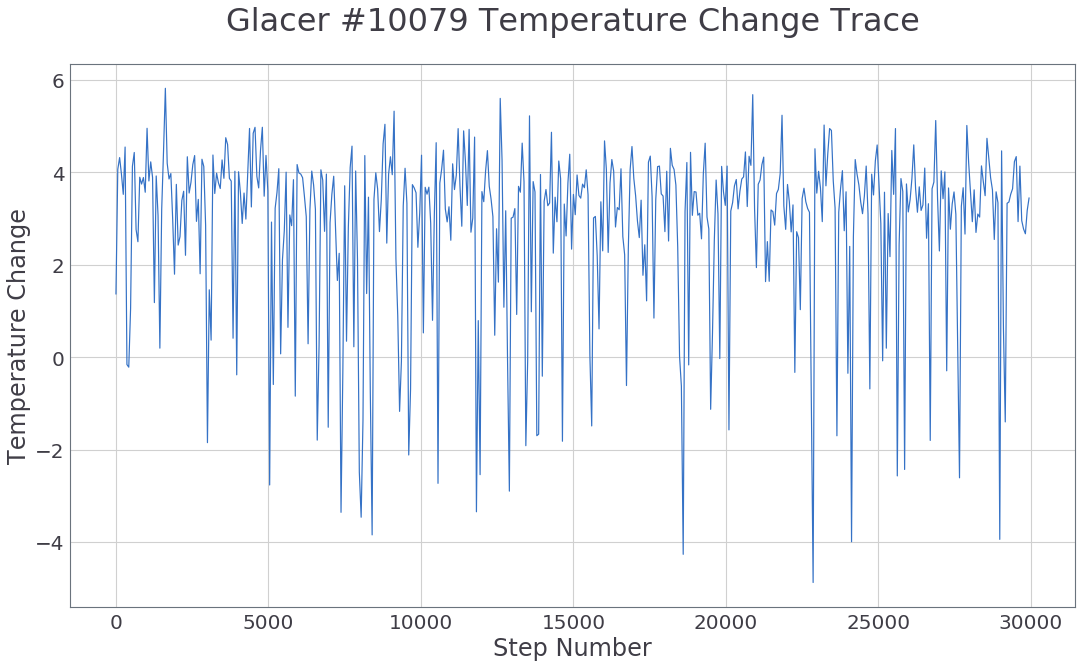

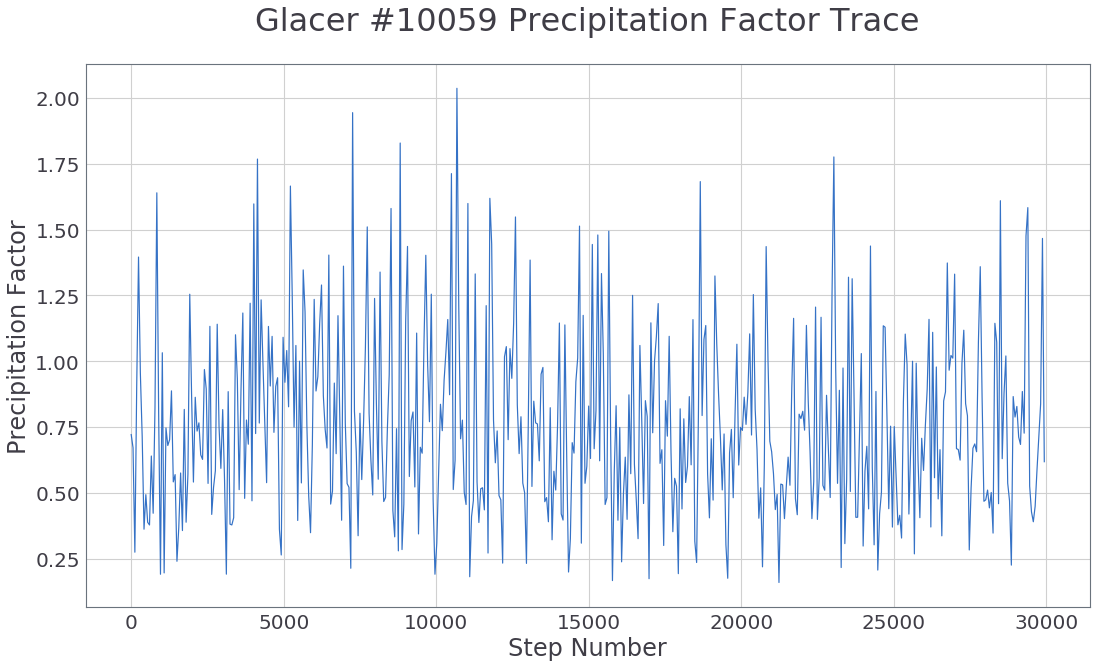

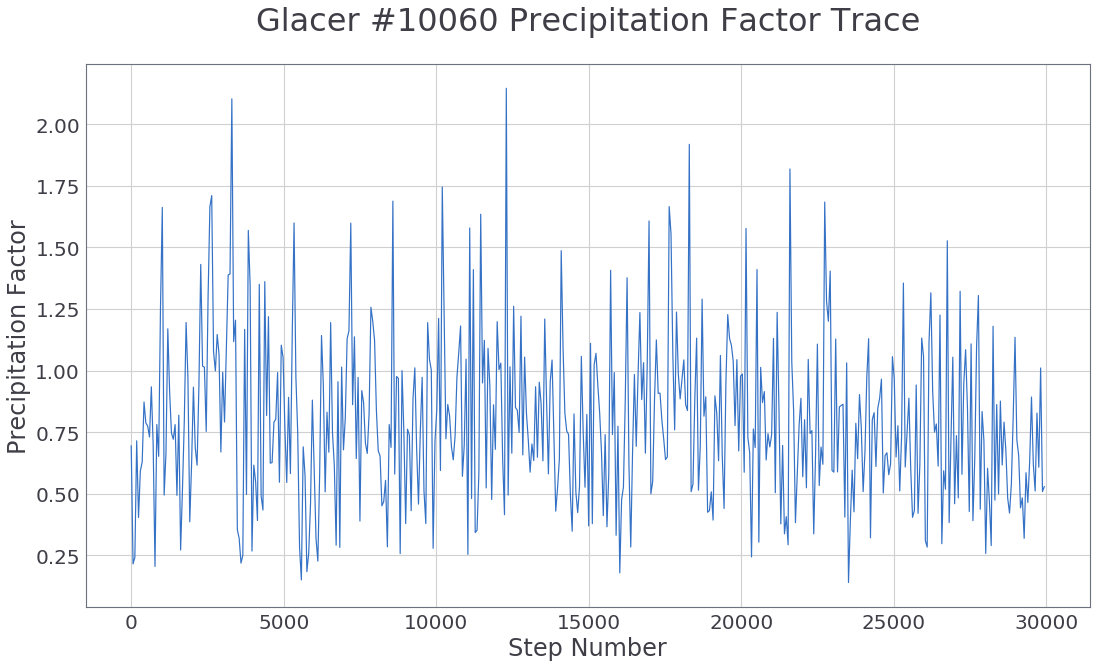

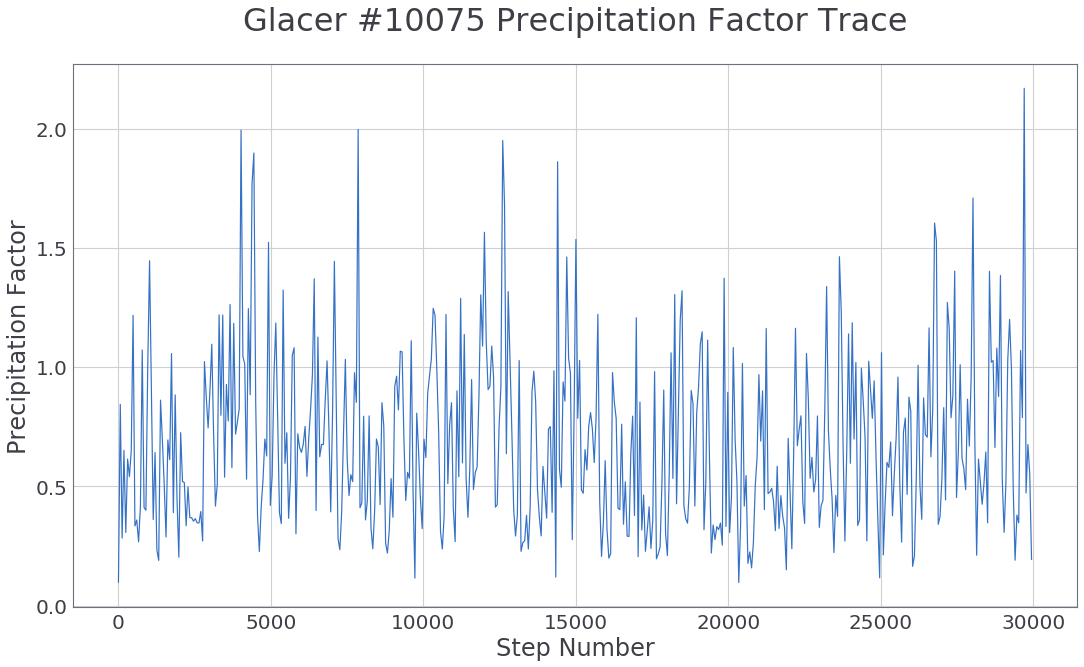

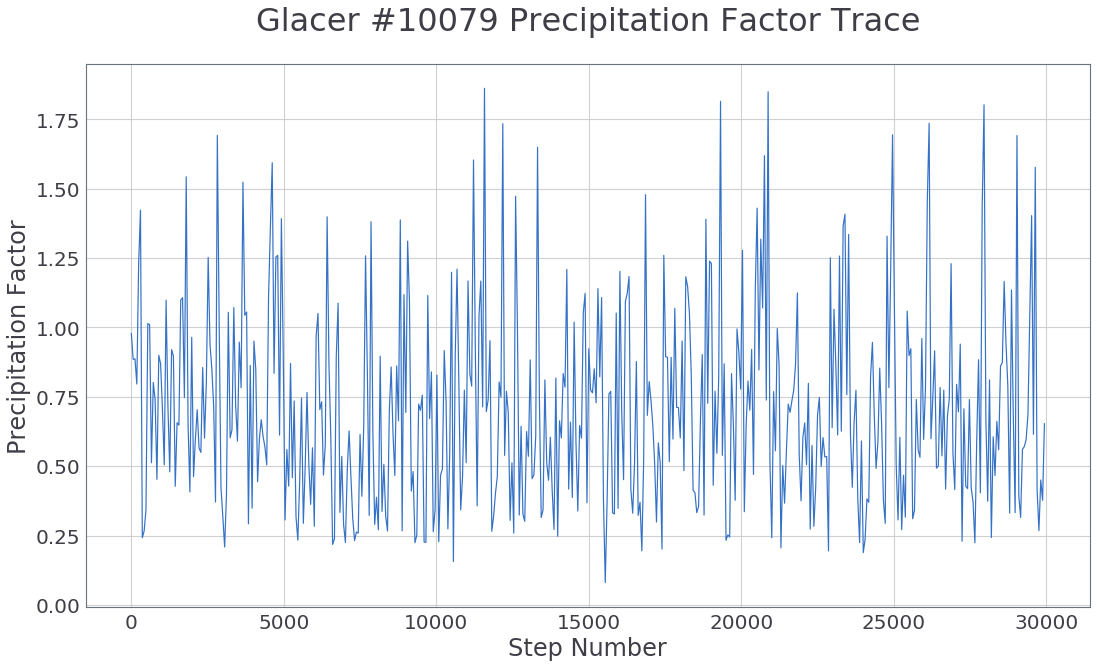

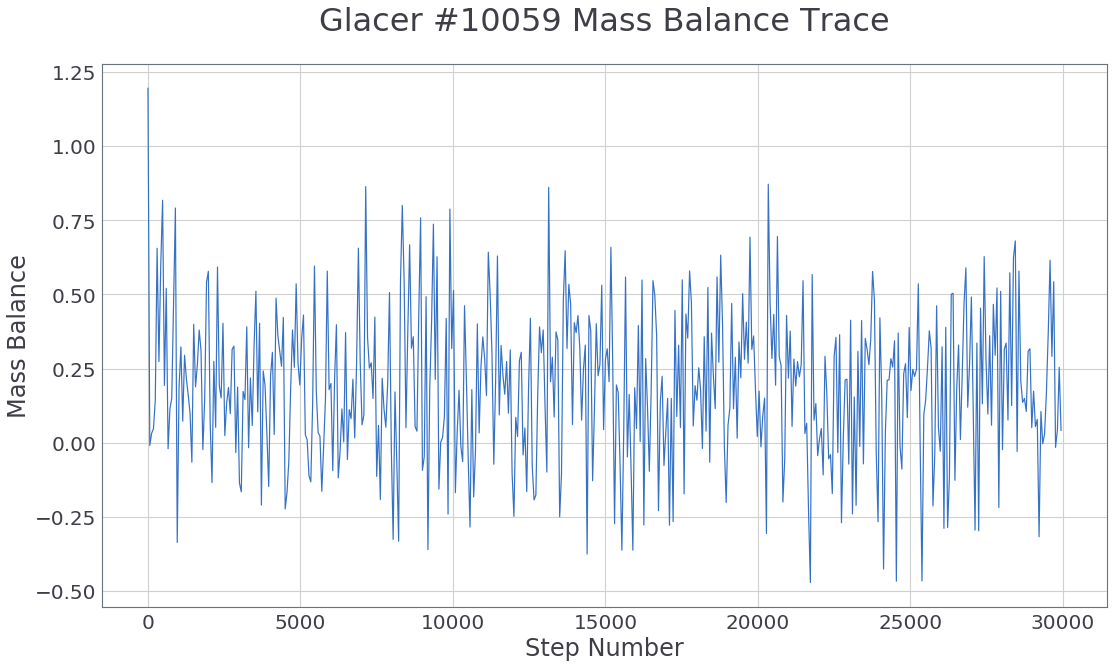

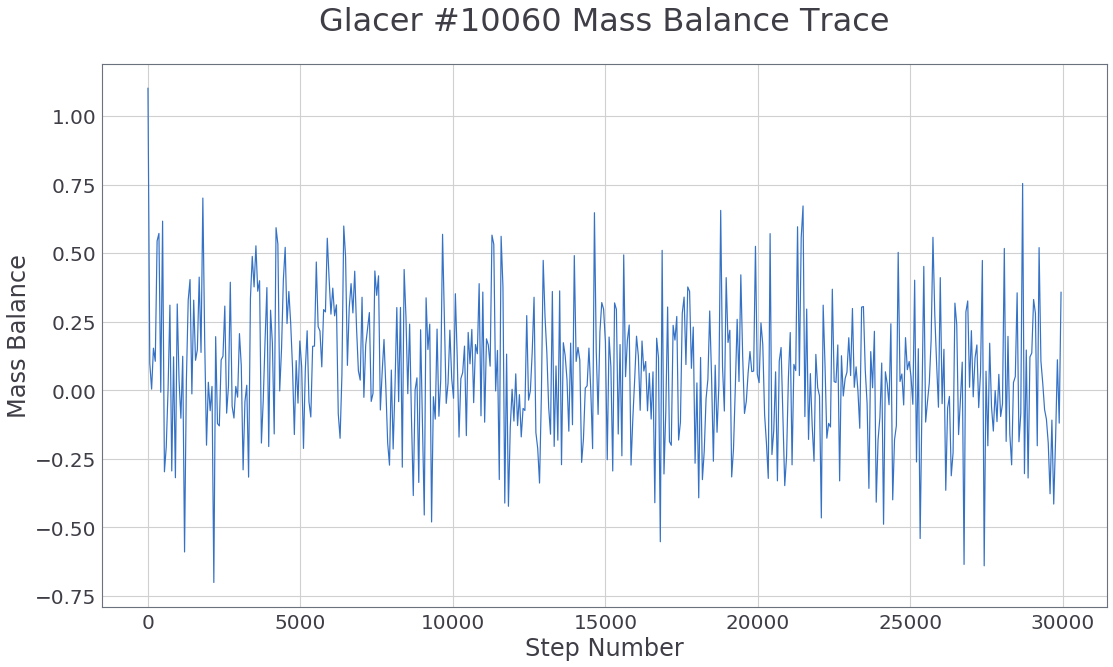

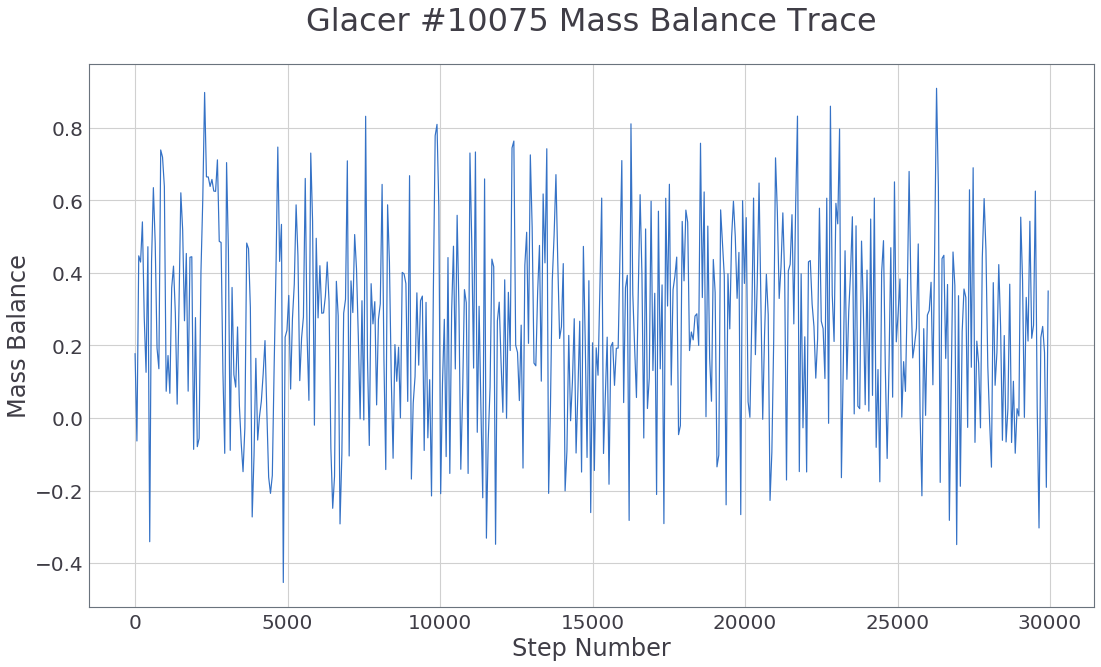

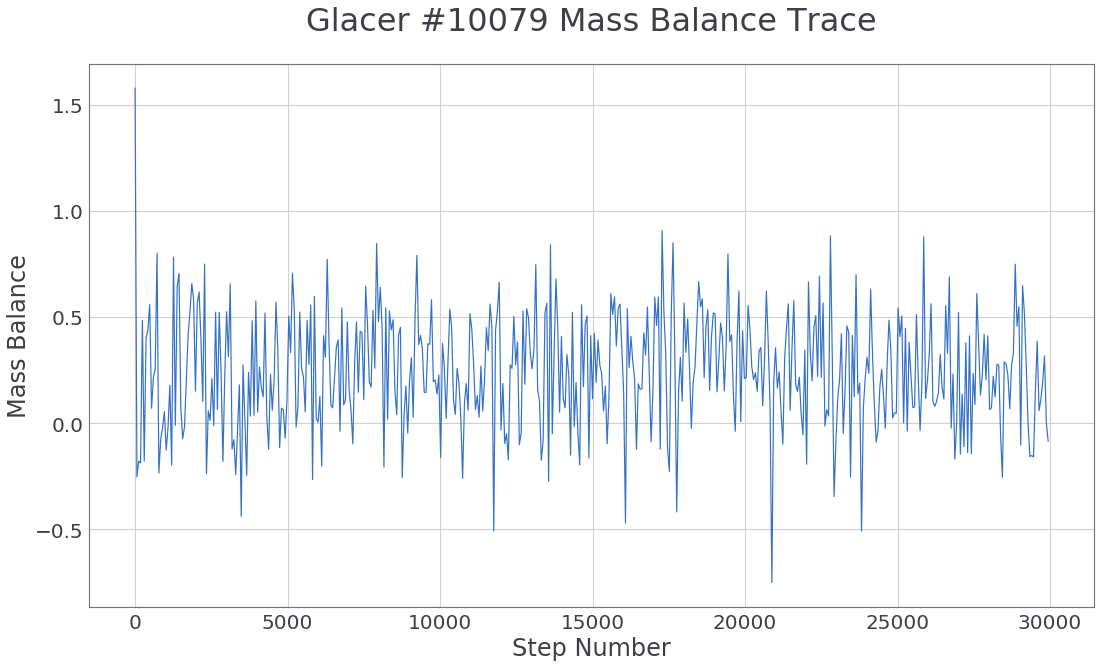

In [4]:
trace_no = 30000

for param, param_pn in param_dict.items():
    for key, value in sample_dict.items():
        trace = value.trace(param)[:trace_no]
        print(type(trace))
        trace = pd.Series(trace)
        print(type(trace))
        
        if trace_no > 500:
            thin_by = trace_no // 500
            trace_thin = trace[::thin_by]
        else:
            trace_thin = trace

        fig = plt.figure()
        plt.plot(trace_thin)
        plt.title('Glacer #' + key + ' ' + param_pn + ' Trace', fontsize = 32, y=1.05)
        plt.ylabel(param_pn, fontsize =24 )
        plt.xlabel('Step Number', fontsize = 24)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        
        name = 'plots/' + key + '_' + param + '_' + str(trace_no) + 'steps' +  '.png'
        print(name)
        #fig.savefig('plots/' + key + '_' + param + '_' + str(trace_no) + 'steps' +  '.png')

In [34]:
trace

0        0.978379
1        0.628703
2        0.390761
3        0.390761
4        0.390761
5        0.390761
6        0.390761
7        0.390761
8        0.390761
9        0.390761
10       0.513802
11       0.513802
12       0.513802
13       0.513802
14       0.576676
15       0.576676
16       0.813949
17       0.813949
18       0.640058
19       0.640058
20       0.640058
21       0.640058
22       0.640058
23       0.640058
24       0.640058
25       0.640058
26       0.640058
27       0.640058
28       0.640058
29       0.640058
           ...   
19970    1.177601
19971    1.177601
19972    1.177601
19973    1.177601
19974    1.078382
19975    0.777886
19976    0.777886
19977    0.777886
19978    0.777886
19979    0.777886
19980    0.777886
19981    0.777886
19982    0.777886
19983    0.777886
19984    0.777886
19985    1.169343
19986    0.754943
19987    0.702949
19988    0.702949
19989    0.702949
19990    0.702949
19991    0.702949
19992    0.702949
19993    0.702949
19994    0

In [39]:
trace[::10]

0        0.978379
10       0.513802
20       0.640058
30       0.746204
40       0.742989
50       0.796547
60       0.884658
70       0.994319
80       0.994319
90       1.381223
100      1.664520
110      1.633555
120      0.886654
130      1.285824
140      1.305520
150      1.305520
160      1.305520
170      1.248750
180      0.795983
190      0.431480
200      0.431480
210      0.431480
220      0.270452
230      0.388250
240      1.230061
250      0.624655
260      0.624655
270      0.624655
280      0.909808
290      1.280509
           ...   
19700    1.263663
19710    0.463575
19720    1.143343
19730    0.576424
19740    0.653255
19750    0.657703
19760    0.510695
19770    0.344066
19780    0.344066
19790    1.102746
19800    0.377086
19810    0.377086
19820    0.441705
19830    0.288644
19840    0.216407
19850    0.485919
19860    0.994528
19870    0.574420
19880    0.358459
19890    0.358459
19900    0.358459
19910    1.599398
19920    0.911329
19930    1.017019
19940    0

(array([-0.004, -0.002,  0.   ,  0.002,  0.004,  0.006,  0.008,  0.01 ,
         0.012]), <a list of 9 Text yticklabel objects>)

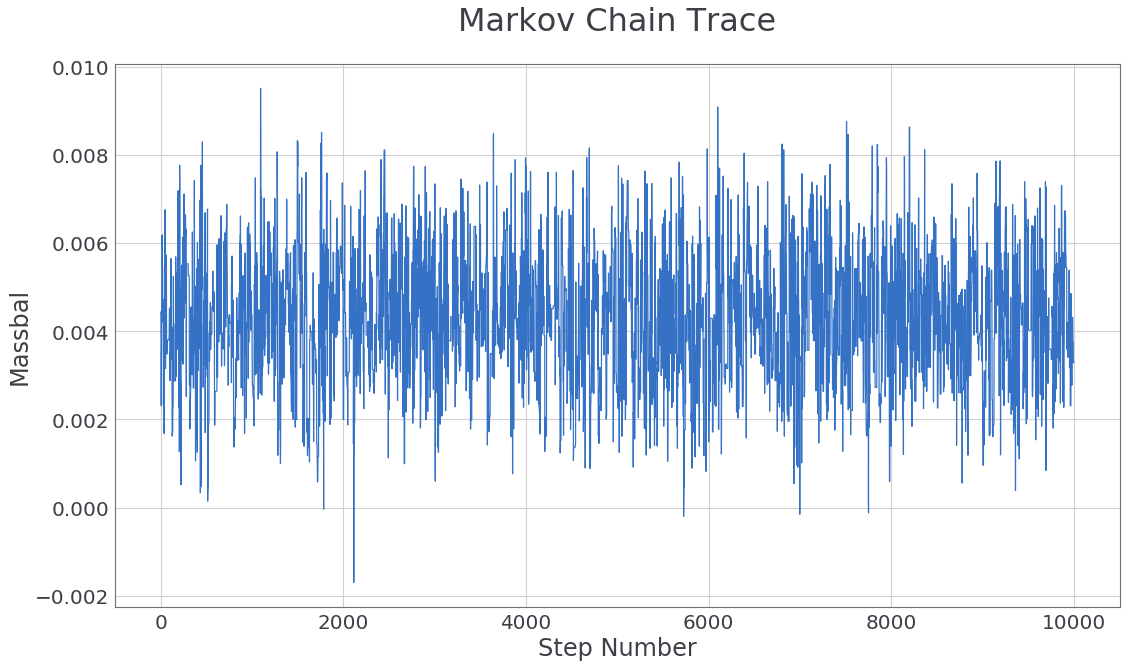

In [14]:
massbal = s4.trace('ddfsnow')[:10000]



fig = plt.figure()
plt.plot(massbal)
plt.title('Markov Chain Trace', fontsize = 32, y=1.05)
plt.ylabel('Massbal', fontsize =24 )
plt.xlabel('Step Number', fontsize = 24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#obs_marker = mlines.Line2D([], [], linewidth=5, color='black',
 #                      label='Observation')

#plt.legend(handles=[obs_marker], loc='upper left', fontsize=20)
#ig.savefig('../data/loobos_timeseries.png')
#plt.pyplot.legend()